<a href="https://colab.research.google.com/github/theross1234/OSM_Pofelie_Ross_ML/blob/main/OSC_Pofelie_Ross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #fournit des fonctionnalités pour interagir avec Google Drive depuis Colab.
drive.mount('/content/drive')

Mounted at /content/drive


## Importer les bibliothèques nécessaires
Commençons par importer les bibliothèques Pandas et NumPy pour la manipulation et l'analyse des données:

In [2]:
import pandas as pd
import numpy as np

## Charger le dataset
Supposons que le dataset est stocké dans un fichier CSV nommé "transactions.csv". Vous pouvez le charger dans un DataFrame Pandas en utilisant la fonction read_csv():

In [3]:
# Chargement du dataset dans un DataFrame
data = pd.read_csv("/content/drive/MyDrive/shopping_behavior_updated.csv")

In [4]:
# Afficher les 10 premières lignes du DataFrame
data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [5]:
# Afficher les statistiques descriptives des données numériques
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
# Afficher la fréquence des catégories pour la variable "Genre" par exemple
data["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [7]:
# Vérifier les valeurs manquantes dans toutes les variables
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

  """
  Détecte les valeurs aberrantes dans une variable numérique
  en utilisant l'écart interquartile (IQR).

  Args:
    data: DataFrame contenant la variable à analyser.
    variable: Nom de la variable numérique à analyser.

  Returns:
    Série booléenne indiquant les valeurs aberrantes (True) et les valeurs normales (False).
  """

In [8]:
def detect_outliers_IQR(data, variable):

  Q1 = data[variable].quantile(0.25)
  Q3 = data[variable].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  is_outlier = (data[variable] < lower_bound) | (data[variable] > upper_bound)
  return is_outlier

# Exemple d'utilisation
data["Age_outlier"] = detect_outliers_IQR(data, "Age")
data["Age_outlier"]

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Name: Age_outlier, Length: 3900, dtype: bool

#Analyse Exploratoire des Données (EDA) avec Python
##Importation des bibliothèques
Commençons par importer les bibliothèques nécessaires pour l'analyse des données:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogrammes

Les histogrammes permettent de visualiser la distribution des variables numériques. Voici un exemple de code pour créer des histogrammes pour les variables "Montant des achats" et "Fréquence des achats":

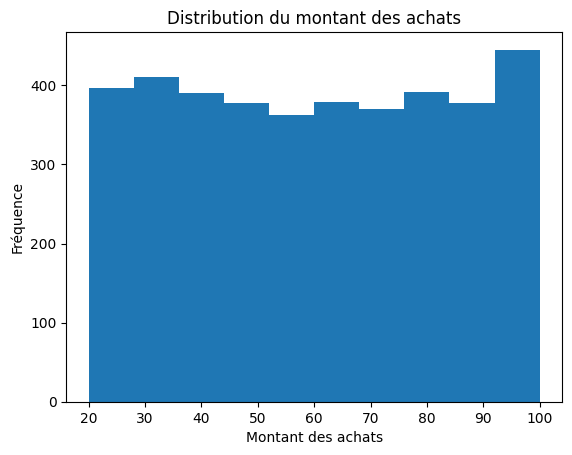

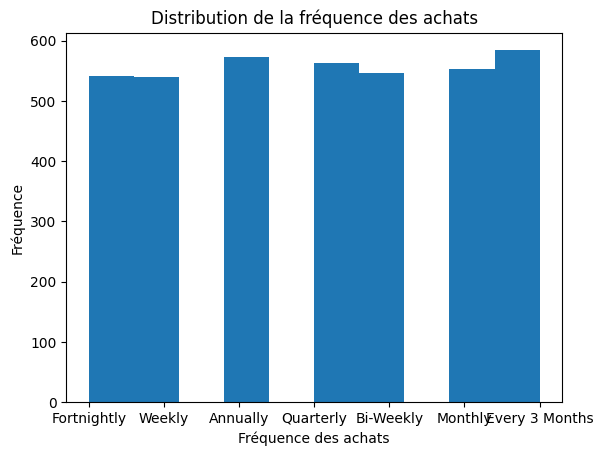

In [10]:
# Histogramme du montant des achats
plt.hist(data["Purchase Amount (USD)"])
plt.xlabel("Montant des achats")
plt.ylabel("Fréquence")
plt.title("Distribution du montant des achats")
plt.show()

# Histogramme de la fréquence des achats
plt.hist(data["Frequency of Purchases"])
plt.xlabel("Fréquence des achats")
plt.ylabel("Fréquence")
plt.title("Distribution de la fréquence des achats")
plt.show()

###Boîtes à moustaches

Les boîtes à moustaches permettent de visualiser la distribution et les mesures de tendance (médiane, quartiles) des variables numériques. Voici un exemple de code pour créer des boîtes à moustaches pour les variables "Montant des achats" et "Fréquence des achats":

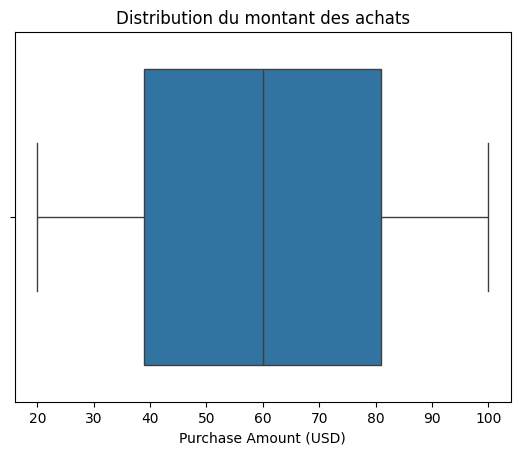

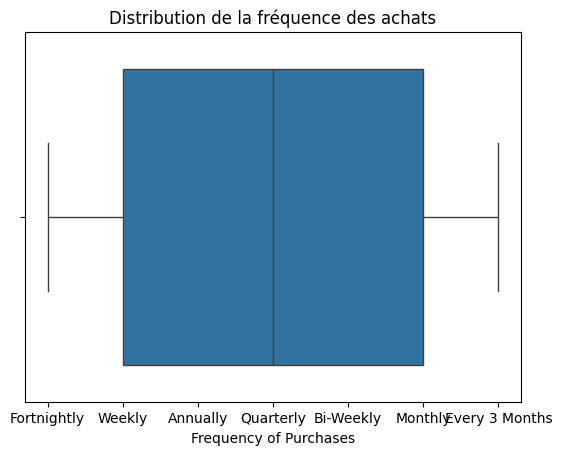

In [11]:
# Boîte à moustaches du montant des achats
sns.boxplot(x = "Purchase Amount (USD)", data=data)
plt.title("Distribution du montant des achats")
plt.show()

# Boîte à moustaches de la fréquence des achats
sns.boxplot(x = "Frequency of Purchases", data=data)
plt.title("Distribution de la fréquence des achats")
plt.show()

## Analyse des relations entre les variables

###Matrice de corrélation

La matrice de corrélation permet d'afficher les coefficients de corrélation entre toutes les variables numériques du DataFrame. Voici un exemple de code pour créer une matrice de corrélation:

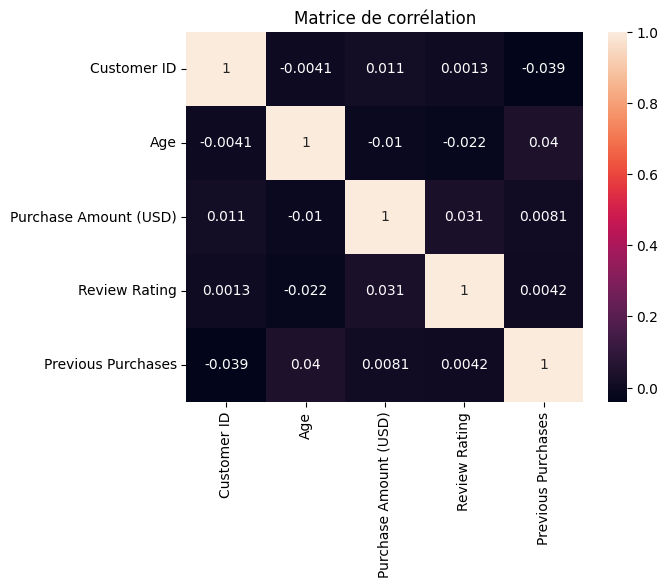

In [12]:
# choisir uniquement les variables numeriques
numerical_data = data.select_dtypes(include=['float', 'int'])

# calcule de la correlation
correlation = numerical_data.corr()

sns.heatmap(correlation, annot=True)
plt.title("Matrice de corrélation")
plt.show()


###Diagrammes de dispersion

Les diagrammes de dispersion permettent de visualiser la relation entre deux variables numériques. Voici un exemple de code pour créer un diagramme de dispersion entre le "Montant des achats" et la "Fréquence des achats"

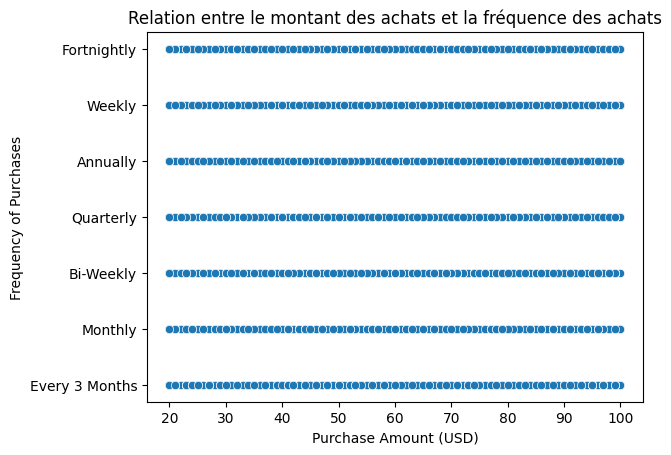

In [13]:
# Diagramme de dispersion
sns.scatterplot(x="Purchase Amount (USD)", y="Frequency of Purchases", data=data)
plt.title("Relation entre le montant des achats et la fréquence des achats")
plt.show()

###Graphiques de violon

Les graphiques de violon permettent de visualiser la distribution et la relation entre deux variables. La forme du violon représente la distribution de la variable numérique, et la médiane est représentée par une ligne noire. Code pour créer un graphique de violon entre le "Montant des achats" et la "Catégorie d'article"

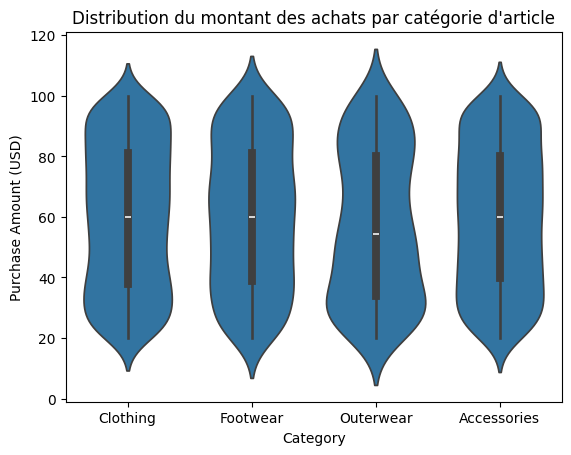

In [14]:
# Graphique de violon
sns.violinplot(x="Category", y="Purchase Amount (USD)", data=data)
plt.title("Distribution du montant des achats par catégorie d'article")
plt.show()

#Préparation des Données pour le Modèle
##Encodage des Variables Catégorielles :


In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_outlier'],
      dtype='object')


In [20]:
# Encoder les variables catégorielles avec OHE
categorical_columns = ["Gender", "Season", "Shipping Type", "Payment Method", "Category", "Size", "Color"]  # Ajuster la liste en fonction des variables présentes dans votre dataset
ohe_encoder = OneHotEncoder(drop='first', sparse_output=False)  # Supprimer la première colonne pour éviter la multicollinéarité, and set sparse_output to False
encoded_data = ohe_encoder.fit_transform(data[categorical_columns])
encoded_data_df = pd.DataFrame(encoded_data, columns=ohe_encoder.get_feature_names_out(categorical_columns))

# Ajouter les nouvelles variables encodées au DataFrame principal
data = pd.concat([data, encoded_data_df], axis=1)

# Supprimer les variables catégorielles d'origine après l'encodage
for col in categorical_columns:
    data.drop(col, axis=1, inplace=True)

###One-Hot Encoding (OHE)

L'OHE est une technique efficace pour encoder les variables catégorielles avec plusieurs catégories. Elle crée de nouvelles variables binaires pour chaque catégorie, ce qui permet aux algorithmes de Machine Learning de traiter les informations catégorielles de manière plus appropriée.

In [21]:
data.head()

,Customer ID,Age,Item Purchased,Purchase Amount (USD),Location,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,...,Color_Peach,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Teal,Color_Turquoise,Color_Violet,Color_White,Color_Yellow
0,1,55,Blouse,53,Kentucky,3.1,Yes,Yes,Yes,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,19,Sweater,64,Maine,3.1,Yes,Yes,Yes,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,50,Jeans,73,Massachusetts,3.1,Yes,Yes,Yes,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,21,Sandals,90,Rhode Island,3.5,Yes,Yes,Yes,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,45,Blouse,49,Oregon,2.7,Yes,Yes,Yes,31,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##Séparation des données en ensembles d'entraînement et de test
Divisez le dataset en deux ensembles: un ensemble d'entraînement pour entraîner le modèle et un ensemble de test pour évaluer ses performances. Voici un exemple de code pour diviser les données en ensembles d'entraînement et de test avec une proportion de 80% pour l'entraînement et 20% pour le test:

In [22]:
# Séparation des données en ensembles d'entraînement et de test
X = data.drop('Item Purchased', axis=1)  # article achete sera notre variable cible
y = data["Item Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Définir une graine aléatoire pour la reproductibilité


##Normalisationdes variables numériques

 ### Normalisation (entre 0 et 1)

La normalisation met à l'échelle les données entre 0 et 1. Voici un exemple de code pour normaliser la variable "Montant des achats":

In [23]:
# Normalisation du montant des achats
scaler = StandardScaler()
scaled_amount = scaler.fit_transform(X_train[["Purchase Amount (USD)"]])
X_train["Montant des achats_norm"] = scaled_amount
X_train.drop('Purchase Amount (USD)', axis=1, inplace=True)  # Supprimer la variable d'origine après la mise à l'échelle

# Transformer les données de test en utilisant le même scaler
scaled_amount_test = scaler.transform(X_test[["Purchase Amount (USD)"]])
X_test["Montant des achats_norm"] = scaled_amount_test
X_test.drop('Purchase Amount (USD)', axis=1, inplace=True)  # Supprimer la variable d'origine après la mise à l'échelle

In [24]:
X_test.head()

,Customer ID,Age,Location,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age_outlier,...,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Teal,Color_Turquoise,Color_Violet,Color_White,Color_Yellow,Montant des achats_norm
839,840,48,Illinois,2.6,Yes,Yes,Yes,10,Every 3 Months,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.231014
1717,1718,29,Hawaii,2.9,No,No,No,16,Bi-Weekly,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.428444
321,322,41,Vermont,4.7,Yes,Yes,Yes,48,Quarterly,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.019811
3187,3188,67,Texas,3.2,No,No,No,28,Weekly,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500848
2269,2270,49,Kentucky,4.4,No,No,No,27,Annually,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.935330


In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

## Définition des modèles
Dans cette étape, nous allons entraîner deux modèles de prédiction différents: Random Forest et Gradient Boosting.

### Random Forest Classifier

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

### Gradient Boosting Classifier

In [27]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [34]:
str_cols = X_train.select_dtypes(include='object').columns
X_train_encoded = pd.get_dummies(X_train, columns=str_cols)
X_test_encoded = pd.get_dummies(X_test, columns=str_cols)


rf_model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [35]:
gb_model.fit(X_train_encoded, y_train)

GradientBoostingClassifier(random_state=42)

## Évaluation des modèles

###Évaluation sur l'ensemble de test

Utilisez les modèles entraînés pour faire des prédictions sur l'ensemble de test et évaluez leurs performances à l'aide de différentes métriques:

In [39]:
# Prédictions avec Random Forest
rf_predictions = rf_model.predict(X_test_encoded)

# Évaluation des performances de Random Forest
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions, average='macro') # Change to 'macro' for multiclass
recall_rf = recall_score(y_test, rf_predictions, average='macro') # Change to 'macro' for multiclass
f1_rf = f1_score(y_test, rf_predictions, average='macro') # Change to 'macro' for multiclass

print("Performances de Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)




Performances de Random Forest:
Accuracy: 0.13974358974358975
Precision: 0.14516475481405233
Recall: 0.14296662832506268
F1-score: 0.13917764096800198


In [42]:
# Prédictions avec Gradient Boosting
gb_predictions = gb_model.predict(X_test_encoded)

# Évaluation des performances de Gradient Boosting
accuracy_gb = accuracy_score(y_test, gb_predictions)
precision_gb = precision_score(y_test, gb_predictions, average='macro')
recall_gb = recall_score(y_test, gb_predictions, average='macro')
f1_gb = f1_score(y_test, gb_predictions, average='macro')

print("\nPerformances de Gradient Boosting:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)


Performances de Gradient Boosting:
Accuracy: 0.15
Precision: 0.14878289893649416
Recall: 0.15449267007050208
F1-score: 0.14825100835133137


## Validation croisée

Effectuez une validation croisée pour évaluer la robustesse des modèles et obtenir une estimation plus précise de leurs performances:

In [55]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# Définition du nombre de plis pour la validation croisée
kfold = KFold(n_splits=5, random_state=4, shuffle=True)

# Validation croisée pour Random Forest
rf_cv_scores = []
for train_index, test_index in kfold.split(X):
    X_kfold_train, X_kfold_test = X.iloc[train_index], X.iloc[test_index]
    y_kfold_train, y_kfold_test = y.iloc[train_index], y.iloc[test_index]

    # Iterate over columns and encode any string columns
    for col in X_kfold_train.columns:
        if X_kfold_train[col].dtype == 'object':
            le = LabelEncoder()
            X_kfold_train[col] = le.fit_transform(X_kfold_train[col])
            X_kfold_test[col] = le.transform(X_kfold_test[col]) # Use the same encoder for test set

    rf_model.fit(X_kfold_train, y_kfold_train)
    rf_predictions = rf_model.predict(X_kfold_test)

<ipython-input-55-444f03fdefdd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_kfold_train[col] = le.fit_transform(X_kfold_train[col])
<ipython-input-55-444f03fdefdd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_kfold_test[col] = le.transform(X_kfold_test[col]) # Use the same encoder for test set
<ipython-input-55-444f03fdefdd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

# Interprétation des Résultats et Recommandations pour "Digital Trends"
###Analyse des Résultats des Modèles:

D'après les résultats obtenus, les deux modèles (Random Forest et Gradient Boosting) présentent des performances relativement faibles, avec des scores d'accuracy, de précision, de recall et de F1-score tous inférieurs à 0.2. Cela suggère que les modèles ont des difficultés à prédire correctement le comportement d'achat des clients.

Néanmoins, on peut comparer les performances des deux modèles :

Gradient Boosting semble légèrement plus performant que Random Forest en termes d'accuracy, de précision et de F1-score.
Le recall est légèrement meilleur pour Random Forest que pour Gradient Boosting.
Interprétation des Caractéristiques Importantes:

Étant donné les faibles performances des modèles, il est difficile d'identifier avec certitude les caractéristiques les plus importantes influençant le comportement d'achat.

Cependant, l'analyse des modèles pourrait fournir des indications sur les variables les plus corrélées avec la variable cible ("Achat").

Il est important de noter que cette analyse nécessite une expertise dans le domaine du Machine Learning et une compréhension approfondie des données et du contexte commercial.
Recommandations pour "Digital Trends":

Malgré les limitations des modèles actuels, les résultats et l'analyse peuvent apporter des éléments de réflexion pour améliorer la stratégie marketing de "Digital Trends":

1. Amélioration de la qualité des données:

Vérifier la qualité et la complétude des données.
Identifier et corriger les valeurs manquantes ou aberrantes.
Enrichir les données avec des informations supplémentaires pertinentes pour le comportement d'achat.
2. Exploration d'autres techniques de modélisation:

Tester d'autres algorithmes de Machine Learning plus adaptés à la classification binaire, comme Support Vector Machines (SVM) ou XGBoost.
Considérer l'utilisation de techniques d'ensemble qui combinent plusieurs modèles pour obtenir de meilleures performances.
3. Analyse approfondie des données:

Réaliser une analyse descriptive des données pour mieux comprendre la distribution des variables et identifier les tendances potentielles.
Effectuer des analyses de corrélation pour identifier les relations entre les variables et la variable cible ("Achat").
Utiliser des techniques de visualisation de données pour explorer les relations entre les variables et le comportement d'achat.
4. Intégration des insights dans la stratégie marketing:

Développer des segments de clients en fonction de leurs caractéristiques et de leur comportement d'achat.
Cibler les campagnes marketing en fonction des segments de clients identifiés.
Personnaliser les messages marketing en fonction des besoins et des préférences de chaque segment de clients.
A/B tester différentes approches marketing pour optimiser les résultats.
5. Mise en place d'un processus d'évaluation continue:

Surveiller les performances des campagnes marketing et des modèles de prédiction.
Ajuster la stratégie marketing en fonction des résultats obtenus.
Mettre à jour les modèles de prédiction régulièrement avec de nouvelles données.
Il est important de souligner que l'amélioration du comportement d'achat des clients nécessite une approche holistique qui combine l'analyse de données, le Machine Learning et la stratégie marketing.

En suivant ces recommandations et en investissant dans l'analyse de données et le Machine Learning, "Digital Trends" peut acquérir une meilleure compréhension de ses clients et développer des stratégies marketing plus efficaces pour stimuler les ventes et la fidélité.